In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
#from sklearn_genetic import GAFeatureSelectionCV

In [39]:

# # --- Load CSV ---
# data = pd.read_csv('./radiomics_features_washu2_p1_143_with_labels.csv')

# # --- Prepare features and labels ---
# X = data.drop(columns=['PatientID', 'GT'])
# y = (data['GT']<1).astype(int)  # Convert GT to binary labels

# # --- Split train/test ---
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [40]:
# import pandas as pd
# from sklearn.model_selection import GroupShuffleSplit

# # --- Load the data ---
# data = pd.read_csv('./radiomics_features_washu2_p1_143_with_labels_sdf3_nd_normseg.csv')

# # --- Prepare features and labels ---  
# X = data.drop(columns=['PatientID', 'GT', 'ImagePath', 'Patient ID'])
# y = (data['GT'] < 1).astype(int)

# # --- Group labels by PatientID ---
# groups = data['PatientID']

# # --- Split train/test based on PatientID groups ---
# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=1423)

# train_idx, test_idx = next(gss.split(X, y, groups))
# X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
# y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# # ✅ Done!
# print(f"Train patients: {groups.iloc[train_idx].nunique()} | Test patients: {groups.iloc[test_idx].nunique()}")
# print(f"Train samples: {len(X_train)} | Test samples: {len(X_test)}")


In [41]:
# selected_features = ['original_shape2D_Elongation', 'original_shape2D_MeshSurface', 'original_shape2D_MinorAxisLength', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_shape2D_Sphericity', 'original_firstorder_Energy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Mean', 'original_firstorder_Minimum', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterShade', 'original_glcm_Correlation', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idmn', 'original_glcm_JointAverage', 'original_glcm_JointEntropy', 'original_glcm_SumEntropy', 'original_glcm_SumSquares', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'wavelet-H_firstorder_10Percentile', 'wavelet-H_firstorder_90Percentile', 'wavelet-H_firstorder_InterquartileRange', 'wavelet-H_firstorder_Mean', 'wavelet-H_firstorder_Range', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-H_firstorder_Skewness', 'wavelet-H_firstorder_Uniformity', 'wavelet-H_firstorder_Variance', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_ClusterTendency', 'wavelet-H_glcm_Contrast', 'wavelet-H_glcm_Correlation', 'wavelet-H_glcm_DifferenceAverage', 'wavelet-H_glcm_DifferenceEntropy', 'wavelet-H_glcm_DifferenceVariance', 'wavelet-H_glcm_Idmn', 'wavelet-H_glcm_Imc2', 'wavelet-H_glcm_InverseVariance', 'wavelet-H_glcm_JointAverage', 'wavelet-H_glcm_JointEntropy', 'wavelet-H_glcm_MCC', 'wavelet-H_glcm_SumAverage', 'wavelet-H_glcm_SumSquares', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized', 'wavelet-H_glszm_LargeAreaEmphasis', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis', 'wavelet-H_glszm_LowGrayLevelZoneEmphasis', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized', 'wavelet-H_glszm_ZonePercentage', 'wavelet-H_glszm_ZoneVariance', 'wavelet-L_firstorder_10Percentile', 'wavelet-L_firstorder_Energy', 'wavelet-L_firstorder_Entropy', 'wavelet-L_firstorder_InterquartileRange', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_firstorder_Maximum', 'wavelet-L_firstorder_MeanAbsoluteDeviation', 'wavelet-L_firstorder_Mean', 'wavelet-L_firstorder_Minimum', 'wavelet-L_firstorder_Range', 'wavelet-L_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-L_firstorder_RootMeanSquared', 'wavelet-L_firstorder_TotalEnergy', 'wavelet-L_firstorder_Uniformity', 'wavelet-L_glcm_ClusterProminence', 'wavelet-L_glcm_ClusterShade', 'wavelet-L_glcm_Contrast', 'wavelet-L_glcm_DifferenceEntropy', 'wavelet-L_glcm_Imc2', 'wavelet-L_glcm_JointAverage', 'wavelet-L_glcm_JointEntropy', 'wavelet-L_glcm_SumEntropy', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-L_glrlm_RunEntropy', 
# 'wavelet-L_glrlm_RunPercentage', 'wavelet-L_glrlm_ShortRunEmphasis', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-L_glszm_GrayLevelNonUniformity', 'wavelet-L_glszm_GrayLevelVariance', 'wavelet-L_glszm_LargeAreaEmphasis', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_glszm_SmallAreaEmphasis', 
# 'wavelet-L_glszm_ZonePercentage', 'wavelet-L_glszm_ZoneVariance']

In [42]:
# selected features based on multiple models
#selected_features = ['original_shape2D_Elongation', 'original_shape2D_MajorAxisLength', 'original_shape2D_Perimeter', 'original_shape2D_PerimeterSurfaceRatio', 'original_shape2D_PixelSurface', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Entropy', 'original_firstorder_Kurtosis', 'original_firstorder_Median', 'original_firstorder_Range', 'original_firstorder_RootMeanSquared', 'original_glcm_Contrast', 'original_glcm_DifferenceAverage', 'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance', 'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Imc1', 'original_glcm_JointEnergy', 'original_glcm_SumEntropy', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis', 'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformityNormalized', 'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-H_firstorder_90Percentile', 'wavelet-H_firstorder_Energy', 'wavelet-H_firstorder_Median', 'wavelet-H_firstorder_Minimum', 'wavelet-H_firstorder_RootMeanSquared', 'wavelet-H_glcm_Autocorrelation', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_ClusterTendency', 'wavelet-H_glcm_Idm', 'wavelet-H_glcm_Idmn', 'wavelet-H_glcm_Imc1', 'wavelet-H_glcm_Imc2', 'wavelet-H_glcm_JointAverage', 'wavelet-H_glcm_JointEnergy', 'wavelet-H_glcm_SumAverage', 'wavelet-H_glrlm_GrayLevelNonUniformity', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis', 'wavelet-H_glszm_GrayLevelNonUniformity', 'wavelet-H_glszm_LargeAreaEmphasis', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_firstorder_Maximum', 'wavelet-L_firstorder_Mean', 'wavelet-L_firstorder_Skewness', 'wavelet-L_firstorder_TotalEnergy', 'wavelet-L_firstorder_Uniformity', 'wavelet-L_glcm_DifferenceAverage', 'wavelet-L_glcm_DifferenceEntropy', 'wavelet-L_glcm_DifferenceVariance', 'wavelet-L_glcm_Id', 'wavelet-L_glcm_Idn', 'wavelet-L_glcm_Imc2', 'wavelet-L_glcm_JointEnergy', 'wavelet-L_glcm_MCC', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumSquares', 'wavelet-L_glrlm_GrayLevelNonUniformity', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_ShortRunEmphasis', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-L_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis', 'wavelet-L_glszm_ZoneVariance', 'original_shape2D_Sphericity', 'original_firstorder_TotalEnergy', 'original_glcm_ClusterProminence', 'original_glcm_ClusterTendency', 'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability', 'original_glrlm_GrayLevelNonUniformityNormalized', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy', 'wavelet-H_firstorder_Maximum', 'wavelet-H_glcm_Correlation', 'wavelet-H_glcm_DifferenceEntropy', 'wavelet-H_glcm_JointEntropy', 'wavelet-H_glcm_SumEntropy', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-H_glrlm_RunLengthNonUniformity', 'wavelet-H_glszm_SmallAreaEmphasis', 'wavelet-L_firstorder_10Percentile', 'wavelet-L_firstorder_Energy', 'wavelet-L_firstorder_Entropy', 'wavelet-L_firstorder_InterquartileRange', 'wavelet-L_glcm_Correlation', 'wavelet-L_glcm_InverseVariance', 'wavelet-L_glcm_JointAverage', 'wavelet-L_glrlm_RunLengthNonUniformity', 'original_shape2D_MinorAxisLength', 'original_firstorder_InterquartileRange', 'wavelet-H_glcm_ClusterShade', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-L_glcm_Imc1', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis']

In [43]:
#selected_features = ['original_shape2D_MinorAxisLength', 'original_firstorder_Entropy', 'original_firstorder_Range', 'original_firstorder_Skewness', 'original_firstorder_Uniformity', 'original_glcm_ClusterProminence', 'original_glcm_JointAverage', 'original_glcm_MCC', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_HighGrayLevelZoneEmphasis', 'original_glszm_LargeAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis', 'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance', 'wavelet-H_firstorder_10Percentile', 'wavelet-H_glcm_Id', 'wavelet-H_glcm_Idn', 'wavelet-H_glrlm_LongRunEmphasis', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-H_glszm_ZonePercentage', 'wavelet-H_glszm_ZoneVariance', 'wavelet-L_glcm_Idm', 'wavelet-L_glcm_Imc1', 'wavelet-L_glcm_MaximumProbability', 'wavelet-L_glcm_SumAverage', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized', 'wavelet-L_glrlm_RunVariance', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized', 'wavelet-L_glszm_LargeAreaEmphasis', 'wavelet-L_glszm_SmallAreaEmphasis', 'original_firstorder_Minimum', 'original_glcm_SumEntropy', 'original_glrlm_LongRunLowGrayLevelEmphasis', 'wavelet-H_glcm_ClusterProminence', 'wavelet-H_glcm_DifferenceAverage', 'wavelet-H_glcm_Imc1', 'wavelet-L_firstorder_Kurtosis', 'wavelet-L_glcm_SumEntropy', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized']

In [44]:
#selected_features = ['Unnamed: 0', 'original_shape2D_Elongation_x', 'original_shape2D_MajorAxisLength_x', 'original_shape2D_MaximumDiameter_x', 'original_shape2D_Perimeter_x', 'original_firstorder_InterquartileRange_x', 'original_firstorder_Range_x', 'original_firstorder_RobustMeanAbsoluteDeviation_x', 'original_firstorder_Variance_x', 'original_glcm_ClusterTendency_x', 'original_glcm_Correlation_x', 'original_glcm_DifferenceEntropy_x', 'original_glcm_DifferenceVariance_x', 'original_glcm_Idn_x', 'original_glcm_Imc1_x', 'original_glcm_Imc2_x', 'original_glrlm_GrayLevelNonUniformity_x', 'original_glrlm_GrayLevelNonUniformityNormalized_x', 'original_glrlm_GrayLevelVariance_x', 'original_glrlm_LongRunEmphasis_x', 'original_glrlm_LongRunHighGrayLevelEmphasis_x', 'original_glrlm_RunEntropy_x', 'original_glrlm_RunPercentage_x', 'original_glrlm_RunVariance_x', 'original_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glszm_GrayLevelNonUniformity_x', 'original_glszm_GrayLevelVariance_x', 'original_glszm_LargeAreaHighGrayLevelEmphasis_x', 'original_glszm_SizeZoneNonUniformityNormalized_x', 'original_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_glszm_ZoneEntropy_x', 'wavelet-H_firstorder_Energy_x', 'wavelet-H_firstorder_Skewness_x', 'wavelet-H_firstorder_TotalEnergy_x', 'wavelet-H_glcm_ClusterShade_x', 'wavelet-H_glcm_Contrast_x', 'wavelet-H_glcm_Correlation_x', 'wavelet-H_glcm_DifferenceEntropy_x', 'wavelet-H_glcm_Id_x', 'wavelet-H_glcm_Idmn_x', 'wavelet-H_glcm_Idn_x', 'wavelet-H_glcm_MCC_x', 'wavelet-H_glcm_SumAverage_x', 'wavelet-H_glrlm_GrayLevelNonUniformity_x', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-H_glrlm_RunEntropy_x', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-H_glszm_GrayLevelNonUniformity_x', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glszm_GrayLevelVariance_x', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_ZoneEntropy_x', 'wavelet-H_glszm_ZoneVariance_x', 'wavelet-L_firstorder_10Percentile_x', 'wavelet-L_firstorder_90Percentile_x', 'wavelet-L_firstorder_Energy_x', 'wavelet-L_firstorder_Kurtosis_x', 'wavelet-L_firstorder_MeanAbsoluteDeviation_x', 'wavelet-L_firstorder_Skewness_x', 'wavelet-L_firstorder_TotalEnergy_x', 'wavelet-L_glcm_DifferenceEntropy_x', 'wavelet-L_glcm_DifferenceVariance_x', 'wavelet-L_glcm_InverseVariance_x', 'wavelet-L_glcm_JointEnergy_x', 'wavelet-L_glrlm_GrayLevelNonUniformity_x', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis_x', 'wavelet-L_glrlm_LongRunEmphasis_x', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_RunLengthNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_x', 'wavelet-L_glrlm_ShortRunEmphasis_x', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-L_glszm_GrayLevelNonUniformity_x', 'wavelet-L_glszm_LargeAreaEmphasis_x', 'wavelet-L_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_shape2D_MinorAxisLength_y', 'original_shape2D_PerimeterSurfaceRatio_y', 'original_shape2D_PixelSurface_y', 'original_firstorder_10Percentile_y', 'original_firstorder_MeanAbsoluteDeviation_y', 'original_firstorder_Median_y', 'original_firstorder_RootMeanSquared_y', 'original_firstorder_Variance_y', 'original_glcm_ClusterShade_y', 'original_glcm_ClusterTendency_y', 'original_glcm_Correlation_y', 'original_glcm_DifferenceAverage_y', 'original_glcm_DifferenceEntropy_y', 'original_glcm_Idn_y', 'original_glcm_InverseVariance_y', 'original_glcm_JointEntropy_y', 'original_glcm_MaximumProbability_y', 'original_glrlm_GrayLevelNonUniformityNormalized_y', 'original_glrlm_GrayLevelVariance_y', 'original_glrlm_LongRunEmphasis_y', 'original_glrlm_LowGrayLevelRunEmphasis_y', 'original_glrlm_RunPercentage_y', 'original_glrlm_ShortRunEmphasis_y', 'original_glszm_GrayLevelVariance_y', 'original_glszm_LargeAreaEmphasis_y', 'original_glszm_LargeAreaLowGrayLevelEmphasis_y', 'original_glszm_SizeZoneNonUniformity_y', 'original_glszm_SizeZoneNonUniformityNormalized_y', 'original_glszm_SmallAreaEmphasis_y', 'wavelet-H_firstorder_90Percentile_y', 'wavelet-H_firstorder_Energy_y', 'wavelet-H_firstorder_Entropy_y', 'wavelet-H_firstorder_Uniformity_y', 'wavelet-H_glcm_Idmn_y', 'wavelet-H_glcm_InverseVariance_y', 'wavelet-H_glcm_JointEnergy_y', 'wavelet-H_glcm_JointEntropy_y', 'wavelet-H_glrlm_GrayLevelNonUniformity_y', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-H_glrlm_RunLengthNonUniformityNormalized_y', 'wavelet-H_glrlm_RunPercentage_y', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_y', 'wavelet-H_glszm_SizeZoneNonUniformity_y', 'wavelet-H_glszm_ZonePercentage_y', 'wavelet-L_firstorder_90Percentile_y', 'wavelet-L_firstorder_Kurtosis_y', 'wavelet-L_firstorder_Maximum_y', 'wavelet-L_firstorder_Median_y', 'wavelet-L_firstorder_RootMeanSquared_y', 'wavelet-L_firstorder_Skewness_y', 'wavelet-L_glcm_Autocorrelation_y', 'wavelet-L_glcm_ClusterTendency_y', 'wavelet-L_glcm_Correlation_y', 'wavelet-L_glcm_DifferenceEntropy_y', 'wavelet-L_glcm_Idmn_y', 'wavelet-L_glcm_Idn_y', 'wavelet-L_glcm_Imc1_y', 'wavelet-L_glcm_SumSquares_y', 'wavelet-L_glrlm_GrayLevelVariance_y', 'wavelet-L_glrlm_LongRunEmphasis_y', 'wavelet-L_glrlm_LongRunLowGrayLevelEmphasis_y', 'wavelet-L_glrlm_LowGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunEntropy_y', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_y', 'wavelet-L_glrlm_RunPercentage_y', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-L_glszm_GrayLevelNonUniformity_y', 'wavelet-L_glszm_GrayLevelVariance_y', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_ZoneVariance_y', 'original_shape2D_MeshSurface_x', 'original_firstorder_Kurtosis_x', 'original_firstorder_TotalEnergy_x', 'original_glcm_Id_x', 'original_glcm_Idm_x', 'original_glcm_JointAverage_x', 'original_glcm_SumAverage_x', 'original_glrlm_LowGrayLevelRunEmphasis_x', 'original_glrlm_ShortRunLowGrayLevelEmphasis_x', 'original_glszm_HighGrayLevelZoneEmphasis_x', 'original_glszm_SmallAreaLowGrayLevelEmphasis_x', 'original_glszm_ZonePercentage_x', 'wavelet-H_firstorder_Mean_x', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_x', 'wavelet-H_firstorder_Uniformity_x', 'wavelet-H_glcm_ClusterProminence_x', 'wavelet-H_glcm_SumEntropy_x', 'wavelet-H_glrlm_GrayLevelVariance_x', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformity_x', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_ZonePercentage_x', 'wavelet-L_firstorder_Entropy_x', 'wavelet-L_firstorder_Range_x', 'wavelet-L_firstorder_Variance_x', 'wavelet-L_glcm_Autocorrelation_x', 'wavelet-L_glcm_Correlation_x', 'wavelet-L_glcm_Id_x', 'wavelet-L_glcm_Idmn_x', 'wavelet-L_glcm_Idn_x', 'wavelet-L_glcm_Imc2_x', 'wavelet-L_glcm_MaximumProbability_x', 'wavelet-L_glszm_SizeZoneNonUniformity_x', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized_x', 'original_shape2D_Elongation_y', 'original_firstorder_90Percentile_y', 'original_firstorder_Energy_y', 'original_firstorder_Maximum_y', 'original_glcm_DifferenceVariance_y', 'original_glcm_Idmn_y', 'original_glrlm_RunEntropy_y', 'original_glrlm_ShortRunHighGrayLevelEmphasis_y', 'original_glszm_SmallAreaLowGrayLevelEmphasis_y', 'original_glszm_ZoneEntropy_y', 'wavelet-H_firstorder_Maximum_y', 'wavelet-H_firstorder_Median_y', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_y', 'wavelet-H_glcm_ClusterProminence_y', 'wavelet-H_glcm_Correlation_y', 'wavelet-H_glcm_DifferenceVariance_y', 'wavelet-H_glcm_Id_y', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_y', 'wavelet-H_glrlm_RunVariance_y', 'wavelet-H_glszm_GrayLevelNonUniformity_y', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-H_glszm_ZoneEntropy_y', 'wavelet-L_firstorder_10Percentile_y', 'wavelet-L_firstorder_Entropy_y', 'wavelet-L_glcm_Contrast_y', 'wavelet-L_glcm_DifferenceVariance_y', 'wavelet-L_glcm_Imc2_y', 'wavelet-L_glcm_InverseVariance_y', 'wavelet-L_glcm_SumEntropy_y', 'wavelet-L_glrlm_RunLengthNonUniformity_y', 'wavelet-L_glszm_ZoneEntropy_y', 'original_glcm_JointEntropy_x', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glcm_SumAverage_y', 'wavelet-L_firstorder_MeanAbsoluteDeviation_y', 'wavelet-L_glcm_MaximumProbability_y', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis_y']

In [45]:
#selected_features = ['Unnamed: 0', 'original_shape2D_Elongation_x', 'original_shape2D_MajorAxisLength_x', 'original_shape2D_MaximumDiameter_x', 'original_shape2D_Perimeter_x', 'original_shape2D_PerimeterSurfaceRatio_x', 'original_shape2D_PixelSurface_x', 'original_firstorder_Entropy_x', 'original_firstorder_Range_x', 'original_firstorder_RobustMeanAbsoluteDeviation_x', 'original_glcm_ClusterTendency_x', 'original_glcm_Contrast_x', 'original_glcm_Id_x', 'original_glcm_Idmn_x', 'original_glcm_Idn_x', 'original_glcm_MCC_x', 'original_glcm_MaximumProbability_x', 'original_glcm_SumSquares_x', 'original_glrlm_GrayLevelNonUniformity_x', 'original_glrlm_HighGrayLevelRunEmphasis_x', 'original_glrlm_LongRunLowGrayLevelEmphasis_x', 'original_glrlm_LowGrayLevelRunEmphasis_x', 'original_glrlm_RunEntropy_x', 'original_glrlm_RunLengthNonUniformityNormalized_x', 'original_glrlm_RunPercentage_x', 'original_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glszm_GrayLevelNonUniformity_x', 'original_glszm_HighGrayLevelZoneEmphasis_x', 'original_glszm_ZoneVariance_x', 'wavelet-H_firstorder_10Percentile_x', 'wavelet-H_firstorder_Energy_x', 'wavelet-H_firstorder_Maximum_x', 'wavelet-H_firstorder_MeanAbsoluteDeviation_x', 'wavelet-H_firstorder_RootMeanSquared_x', 'wavelet-H_firstorder_Skewness_x', 'wavelet-H_firstorder_Variance_x', 'wavelet-H_glcm_ClusterTendency_x', 'wavelet-H_glcm_Correlation_x', 'wavelet-H_glcm_DifferenceAverage_x', 'wavelet-H_glcm_DifferenceEntropy_x', 'wavelet-H_glcm_Id_x', 'wavelet-H_glcm_Idn_x', 'wavelet-H_glcm_Imc2_x', 'wavelet-H_glcm_InverseVariance_x', 'wavelet-H_glcm_JointAverage_x', 'wavelet-H_glcm_JointEnergy_x', 'wavelet-H_glcm_MCC_x', 'wavelet-H_glcm_MaximumProbability_x', 'wavelet-H_glcm_SumEntropy_x', 'wavelet-H_glrlm_GrayLevelNonUniformity_x', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glrlm_RunVariance_x', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaEmphasis_x', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_ZoneEntropy_x', 'wavelet-L_firstorder_MeanAbsoluteDeviation_x', 'wavelet-L_firstorder_Uniformity_x', 'wavelet-L_glcm_Autocorrelation_x', 'wavelet-L_glcm_DifferenceAverage_x', 'wavelet-L_glcm_Idm_x', 'wavelet-L_glcm_Idmn_x', 'wavelet-L_glcm_Idn_x', 'wavelet-L_glcm_JointAverage_x', 'wavelet-L_glcm_JointEnergy_x', 'wavelet-L_glcm_JointEntropy_x', 'wavelet-L_glcm_MCC_x', 'wavelet-L_glcm_MaximumProbability_x', 'wavelet-L_glcm_SumSquares_x', 'wavelet-L_glrlm_GrayLevelNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_x', 'wavelet-L_glrlm_RunPercentage_x', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-L_glszm_GrayLevelNonUniformity_x', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-L_glszm_SizeZoneNonUniformity_x', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_glszm_SmallAreaEmphasis_x', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_x', 'original_shape2D_Elongation_y', 'original_shape2D_MeshSurface_y', 'original_shape2D_Perimeter_y', 'original_firstorder_InterquartileRange_y', 'original_firstorder_Range_y', 'original_firstorder_RobustMeanAbsoluteDeviation_y', 'original_firstorder_TotalEnergy_y', 'original_glcm_ClusterProminence_y', 'original_glcm_DifferenceAverage_y', 'original_glcm_DifferenceVariance_y', 'original_glcm_InverseVariance_y', 'original_glcm_JointEnergy_y', 'original_glcm_MCC_y', 'original_glcm_SumEntropy_y', 'original_glrlm_GrayLevelVariance_y', 'original_glrlm_LowGrayLevelRunEmphasis_y', 'original_glrlm_RunEntropy_y', 'original_glrlm_ShortRunLowGrayLevelEmphasis_y', 'original_glszm_GrayLevelNonUniformity_y', 'original_glszm_GrayLevelVariance_y', 'original_glszm_LargeAreaEmphasis_y', 'original_glszm_SizeZoneNonUniformity_y', 'original_glszm_SmallAreaHighGrayLevelEmphasis_y', 'original_glszm_SmallAreaLowGrayLevelEmphasis_y', 'original_glszm_ZoneEntropy_y', 'original_glszm_ZoneVariance_y', 'wavelet-H_firstorder_90Percentile_y', 'wavelet-H_firstorder_Entropy_y', 'wavelet-H_firstorder_InterquartileRange_y', 'wavelet-H_firstorder_Maximum_y', 'wavelet-H_firstorder_MeanAbsoluteDeviation_y', 'wavelet-H_firstorder_Minimum_y', 'wavelet-H_firstorder_Range_y', 'wavelet-H_firstorder_Skewness_y', 'wavelet-H_glcm_ClusterProminence_y', 'wavelet-H_glcm_ClusterTendency_y', 'wavelet-H_glcm_DifferenceVariance_y', 'wavelet-H_glcm_Imc1_y', 'wavelet-H_glcm_Imc2_y', 'wavelet-H_glcm_JointEntropy_y', 'wavelet-H_glcm_MCC_y', 'wavelet-H_glcm_SumAverage_y', 'wavelet-H_glcm_SumEntropy_y', 'wavelet-H_glcm_SumSquares_y', 'wavelet-H_glrlm_GrayLevelNonUniformity_y', 'wavelet-H_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_y', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis_y', 'wavelet-H_glrlm_ShortRunEmphasis_y', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-H_glszm_GrayLevelNonUniformity_y', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glszm_GrayLevelVariance_y', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_ZoneEntropy_y', 'wavelet-H_glszm_ZonePercentage_y', 'wavelet-L_firstorder_90Percentile_y', 'wavelet-L_firstorder_Entropy_y', 'wavelet-L_firstorder_Skewness_y', 'wavelet-L_firstorder_TotalEnergy_y', 'wavelet-L_glcm_Idm_y', 'wavelet-L_glcm_Idmn_y', 'wavelet-L_glcm_Idn_y', 'wavelet-L_glcm_Imc2_y', 'wavelet-L_glcm_JointAverage_y', 'wavelet-L_glcm_MCC_y', 'wavelet-L_glcm_SumAverage_y', 'wavelet-L_glcm_SumSquares_y', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glrlm_LowGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunLengthNonUniformity_y', 'wavelet-L_glrlm_RunVariance_y', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-L_glszm_GrayLevelNonUniformity_y', 'wavelet-L_glszm_LargeAreaEmphasis_y', 'wavelet-L_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaEmphasis_y', 'wavelet-L_glszm_ZoneEntropy_y', 'wavelet-L_glszm_ZonePercentage_y', 'original_firstorder_Median_x', 'original_firstorder_Minimum_x', 'original_firstorder_Uniformity_x', 'original_firstorder_Variance_x', 'original_glcm_Correlation_x', 'original_glcm_DifferenceAverage_x', 'original_glcm_DifferenceEntropy_x', 'original_glcm_JointAverage_x', 'original_glrlm_GrayLevelNonUniformityNormalized_x', 'original_glrlm_GrayLevelVariance_x', 'original_glrlm_RunLengthNonUniformity_x', 'original_glszm_LargeAreaEmphasis_x', 'original_glszm_SizeZoneNonUniformityNormalized_x', 'original_glszm_SmallAreaEmphasis_x', 'original_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_x', 'wavelet-H_firstorder_Uniformity_x', 'wavelet-H_glcm_Idmn_x', 'wavelet-H_glcm_SumAverage_x', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-H_glrlm_LowGrayLevelRunEmphasis_x', 'wavelet-H_glszm_GrayLevelVariance_x', 'wavelet-H_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_firstorder_90Percentile_x', 'wavelet-L_firstorder_Median_x', 'wavelet-L_firstorder_TotalEnergy_x', 'wavelet-L_glcm_Correlation_x', 'wavelet-L_glcm_DifferenceVariance_x', 'wavelet-L_glcm_Imc2_x', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-L_glrlm_RunEntropy_x', 'wavelet-L_glszm_ZonePercentage_x', 'original_shape2D_MajorAxisLength_y', 'original_shape2D_MinorAxisLength_y', 'original_shape2D_PixelSurface_y', 'original_firstorder_Maximum_y', 'original_glcm_ClusterShade_y', 'original_glcm_Correlation_y', 'original_glcm_DifferenceEntropy_y', 'original_glcm_Imc1_y', 'original_glcm_MaximumProbability_y', 'wavelet-H_firstorder_10Percentile_y', 'wavelet-H_firstorder_Median_y', 'wavelet-H_firstorder_TotalEnergy_y', 'wavelet-H_glcm_Autocorrelation_y', 'wavelet-H_glcm_ClusterShade_y', 'wavelet-H_glcm_Idn_y', 'wavelet-H_glcm_JointEnergy_y', 'wavelet-H_glrlm_GrayLevelVariance_y', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_y', 'wavelet-L_firstorder_Energy_y', 'wavelet-L_firstorder_MeanAbsoluteDeviation_y', 'wavelet-L_firstorder_RootMeanSquared_y', 'wavelet-L_firstorder_Variance_y', 'wavelet-L_glcm_Contrast_y', 'wavelet-L_glcm_JointEntropy_y', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunEntropy_y', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glszm_GrayLevelVariance_y', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_ZoneVariance_y', 'original_glcm_JointEnergy_x', 'original_glrlm_RunVariance_x', 'original_glszm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glcm_Autocorrelation_x', 'wavelet-H_glrlm_GrayLevelVariance_x', 'wavelet-L_glcm_SumEntropy_x', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_glcm_Idm_y', 'original_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glcm_Id_y', 'wavelet-H_glrlm_RunEntropy_y', 'wavelet-L_glcm_ClusterShade_y', 'wavelet-L_glcm_DifferenceAverage_y', 'wavelet-L_glcm_InverseVariance_y']

In [46]:
# # Reduce data to selected features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

In [47]:
# print(y_test.sum(), "positive cases")
# print(len(y_test) - y_test.sum(), "negative cases")
# print(1 - y_test.sum()/len(y_test), "negative cases")
# print(y_train.sum(), "positive cases")
# print(1 - y_train.sum()/len(y_train), "negative cases")

In [48]:
# # --- Train different models ---
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
#     "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "KNN": KNeighborsClassifier()
# }


In [49]:
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# import numpy as np
# import matplotlib.pyplot as plt

# results = {}
# roc_curves = {}  # Will store FPR, TPR for each model

# for name, clf in models.items():
#     clf.fit(X_train_selected, y_train)

#     # Predictions
#     y_pred = clf.predict(X_test_selected)
#     y_proba = clf.predict_proba(X_test_selected)[:, 1]  # Positive class only

#     # Metrics
#     acc = accuracy_score(y_test, y_pred)
#     try:
#         roc_auc = roc_auc_score(y_test, y_proba)  # Binary ROC AUC
#     except Exception as e:
#         roc_auc = np.nan
#         print(f"⚠️ {name} AUC could not be calculated: {e}")

#     results[name] = {"Accuracy": acc, "ROC AUC": roc_auc}

#     # Store ROC curve
#     if not np.isnan(roc_auc):
#         fpr, tpr, _ = roc_curve(y_test, y_proba)
#         roc_curves[name] = (fpr, tpr)

# # --- Plot ROC curves for all models (binary) ---
# plt.figure(figsize=(8, 6))
# for model_name, (fpr, tpr) in roc_curves.items():
#     plt.plot(fpr, tpr, lw=2, label=f'{model_name}')

# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison (Binary)')
# plt.legend(loc="lower right", fontsize=8)
# plt.grid()
# plt.tight_layout()
# plt.show()

# # Optional: Print Results
# for model_name, metrics in results.items():
#     print(f"{model_name}: Accuracy = {metrics['Accuracy']:.3f}, ROC AUC = {metrics['ROC AUC']:.3f}")


#### Using all the features combining both sdf and normal segmentation

In [50]:
# combined features selected by GA based on normal and sdf3 combined features with multiple models at min 3 vote basis
radiomics_features = ['Unnamed: 0', 'original_shape2D_Elongation_x', 'original_shape2D_MajorAxisLength_x', 'original_shape2D_MaximumDiameter_x', 'original_shape2D_Perimeter_x', 'original_shape2D_PerimeterSurfaceRatio_x', 'original_shape2D_PixelSurface_x', 'original_firstorder_Entropy_x', 'original_firstorder_Range_x', 'original_firstorder_RobustMeanAbsoluteDeviation_x', 'original_glcm_ClusterTendency_x', 'original_glcm_Contrast_x', 'original_glcm_Id_x', 'original_glcm_Idmn_x', 'original_glcm_Idn_x', 'original_glcm_MCC_x', 'original_glcm_MaximumProbability_x', 'original_glcm_SumSquares_x', 'original_glrlm_GrayLevelNonUniformity_x', 'original_glrlm_HighGrayLevelRunEmphasis_x', 'original_glrlm_LongRunLowGrayLevelEmphasis_x', 'original_glrlm_LowGrayLevelRunEmphasis_x', 'original_glrlm_RunEntropy_x', 'original_glrlm_RunLengthNonUniformityNormalized_x', 'original_glrlm_RunPercentage_x', 'original_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glszm_GrayLevelNonUniformity_x', 'original_glszm_HighGrayLevelZoneEmphasis_x', 'original_glszm_ZoneVariance_x', 'wavelet-H_firstorder_10Percentile_x', 'wavelet-H_firstorder_Energy_x', 'wavelet-H_firstorder_Maximum_x', 'wavelet-H_firstorder_MeanAbsoluteDeviation_x', 'wavelet-H_firstorder_RootMeanSquared_x', 'wavelet-H_firstorder_Skewness_x', 'wavelet-H_firstorder_Variance_x', 'wavelet-H_glcm_ClusterTendency_x', 'wavelet-H_glcm_Correlation_x', 'wavelet-H_glcm_DifferenceAverage_x', 'wavelet-H_glcm_DifferenceEntropy_x', 'wavelet-H_glcm_Id_x', 'wavelet-H_glcm_Idn_x', 'wavelet-H_glcm_Imc2_x', 'wavelet-H_glcm_InverseVariance_x', 'wavelet-H_glcm_JointAverage_x', 'wavelet-H_glcm_JointEnergy_x', 'wavelet-H_glcm_MCC_x', 'wavelet-H_glcm_MaximumProbability_x', 'wavelet-H_glcm_SumEntropy_x', 'wavelet-H_glrlm_GrayLevelNonUniformity_x', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glrlm_RunVariance_x', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaEmphasis_x', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_ZoneEntropy_x', 'wavelet-L_firstorder_MeanAbsoluteDeviation_x', 'wavelet-L_firstorder_Uniformity_x', 'wavelet-L_glcm_Autocorrelation_x', 'wavelet-L_glcm_DifferenceAverage_x', 'wavelet-L_glcm_Idm_x', 'wavelet-L_glcm_Idmn_x', 'wavelet-L_glcm_Idn_x', 'wavelet-L_glcm_JointAverage_x', 'wavelet-L_glcm_JointEnergy_x', 'wavelet-L_glcm_JointEntropy_x', 'wavelet-L_glcm_MCC_x', 'wavelet-L_glcm_MaximumProbability_x', 'wavelet-L_glcm_SumSquares_x', 'wavelet-L_glrlm_GrayLevelNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_x', 'wavelet-L_glrlm_RunPercentage_x', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-L_glszm_GrayLevelNonUniformity_x', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-L_glszm_SizeZoneNonUniformity_x', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_glszm_SmallAreaEmphasis_x', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_x', 'original_shape2D_Elongation_y', 'original_shape2D_MeshSurface_y', 'original_shape2D_Perimeter_y', 'original_firstorder_InterquartileRange_y', 'original_firstorder_Range_y', 'original_firstorder_RobustMeanAbsoluteDeviation_y', 'original_firstorder_TotalEnergy_y', 'original_glcm_ClusterProminence_y', 'original_glcm_DifferenceAverage_y', 'original_glcm_DifferenceVariance_y', 'original_glcm_InverseVariance_y', 'original_glcm_JointEnergy_y', 'original_glcm_MCC_y', 'original_glcm_SumEntropy_y', 'original_glrlm_GrayLevelVariance_y', 'original_glrlm_LowGrayLevelRunEmphasis_y', 'original_glrlm_RunEntropy_y', 'original_glrlm_ShortRunLowGrayLevelEmphasis_y', 'original_glszm_GrayLevelNonUniformity_y', 'original_glszm_GrayLevelVariance_y', 'original_glszm_LargeAreaEmphasis_y', 'original_glszm_SizeZoneNonUniformity_y', 'original_glszm_SmallAreaHighGrayLevelEmphasis_y', 'original_glszm_SmallAreaLowGrayLevelEmphasis_y', 'original_glszm_ZoneEntropy_y', 'original_glszm_ZoneVariance_y', 'wavelet-H_firstorder_90Percentile_y', 'wavelet-H_firstorder_Entropy_y', 'wavelet-H_firstorder_InterquartileRange_y', 'wavelet-H_firstorder_Maximum_y', 'wavelet-H_firstorder_MeanAbsoluteDeviation_y', 'wavelet-H_firstorder_Minimum_y', 'wavelet-H_firstorder_Range_y', 'wavelet-H_firstorder_Skewness_y', 'wavelet-H_glcm_ClusterProminence_y', 'wavelet-H_glcm_ClusterTendency_y', 'wavelet-H_glcm_DifferenceVariance_y', 'wavelet-H_glcm_Imc1_y', 'wavelet-H_glcm_Imc2_y', 'wavelet-H_glcm_JointEntropy_y', 'wavelet-H_glcm_MCC_y', 'wavelet-H_glcm_SumAverage_y', 'wavelet-H_glcm_SumEntropy_y', 'wavelet-H_glcm_SumSquares_y', 'wavelet-H_glrlm_GrayLevelNonUniformity_y', 'wavelet-H_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_y', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis_y', 'wavelet-H_glrlm_ShortRunEmphasis_y', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-H_glszm_GrayLevelNonUniformity_y', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glszm_GrayLevelVariance_y', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_ZoneEntropy_y', 'wavelet-H_glszm_ZonePercentage_y', 'wavelet-L_firstorder_90Percentile_y', 'wavelet-L_firstorder_Entropy_y', 'wavelet-L_firstorder_Skewness_y', 'wavelet-L_firstorder_TotalEnergy_y', 'wavelet-L_glcm_Idm_y', 'wavelet-L_glcm_Idmn_y', 'wavelet-L_glcm_Idn_y', 'wavelet-L_glcm_Imc2_y', 'wavelet-L_glcm_JointAverage_y', 'wavelet-L_glcm_MCC_y', 'wavelet-L_glcm_SumAverage_y', 'wavelet-L_glcm_SumSquares_y', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glrlm_LowGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunLengthNonUniformity_y', 'wavelet-L_glrlm_RunVariance_y', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-L_glszm_GrayLevelNonUniformity_y', 'wavelet-L_glszm_LargeAreaEmphasis_y', 'wavelet-L_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaEmphasis_y', 'wavelet-L_glszm_ZoneEntropy_y', 'wavelet-L_glszm_ZonePercentage_y', 'original_firstorder_Median_x', 'original_firstorder_Minimum_x', 'original_firstorder_Uniformity_x', 'original_firstorder_Variance_x', 'original_glcm_Correlation_x', 'original_glcm_DifferenceAverage_x', 'original_glcm_DifferenceEntropy_x', 'original_glcm_JointAverage_x', 'original_glrlm_GrayLevelNonUniformityNormalized_x', 'original_glrlm_GrayLevelVariance_x', 'original_glrlm_RunLengthNonUniformity_x', 'original_glszm_LargeAreaEmphasis_x', 'original_glszm_SizeZoneNonUniformityNormalized_x', 'original_glszm_SmallAreaEmphasis_x', 'original_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_x', 'wavelet-H_firstorder_Uniformity_x', 'wavelet-H_glcm_Idmn_x', 'wavelet-H_glcm_SumAverage_x', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-H_glrlm_LowGrayLevelRunEmphasis_x', 'wavelet-H_glszm_GrayLevelVariance_x', 'wavelet-H_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_firstorder_90Percentile_x', 'wavelet-L_firstorder_Median_x', 'wavelet-L_firstorder_TotalEnergy_x', 'wavelet-L_glcm_Correlation_x', 'wavelet-L_glcm_DifferenceVariance_x', 'wavelet-L_glcm_Imc2_x', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-L_glrlm_RunEntropy_x', 'wavelet-L_glszm_ZonePercentage_x', 'original_shape2D_MajorAxisLength_y', 'original_shape2D_MinorAxisLength_y', 'original_shape2D_PixelSurface_y', 'original_firstorder_Maximum_y', 'original_glcm_ClusterShade_y', 'original_glcm_Correlation_y', 'original_glcm_DifferenceEntropy_y', 'original_glcm_Imc1_y', 'original_glcm_MaximumProbability_y', 'wavelet-H_firstorder_10Percentile_y', 'wavelet-H_firstorder_Median_y', 'wavelet-H_firstorder_TotalEnergy_y', 'wavelet-H_glcm_Autocorrelation_y', 'wavelet-H_glcm_ClusterShade_y', 'wavelet-H_glcm_Idn_y', 'wavelet-H_glcm_JointEnergy_y', 'wavelet-H_glrlm_GrayLevelVariance_y', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_y', 'wavelet-L_firstorder_Energy_y', 'wavelet-L_firstorder_MeanAbsoluteDeviation_y', 'wavelet-L_firstorder_RootMeanSquared_y', 'wavelet-L_firstorder_Variance_y', 'wavelet-L_glcm_Contrast_y', 'wavelet-L_glcm_JointEntropy_y', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunEntropy_y', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glszm_GrayLevelVariance_y', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_ZoneVariance_y', 'original_glcm_JointEnergy_x', 'original_glrlm_RunVariance_x', 'original_glszm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glcm_Autocorrelation_x', 'wavelet-H_glrlm_GrayLevelVariance_x', 'wavelet-L_glcm_SumEntropy_x', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_glcm_Idm_y', 'original_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glcm_Id_y', 'wavelet-H_glrlm_RunEntropy_y', 'wavelet-L_glcm_ClusterShade_y', 'wavelet-L_glcm_DifferenceAverage_y', 'wavelet-L_glcm_InverseVariance_y']


🔁 Seed 0


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 1


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 2


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 3


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 4


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


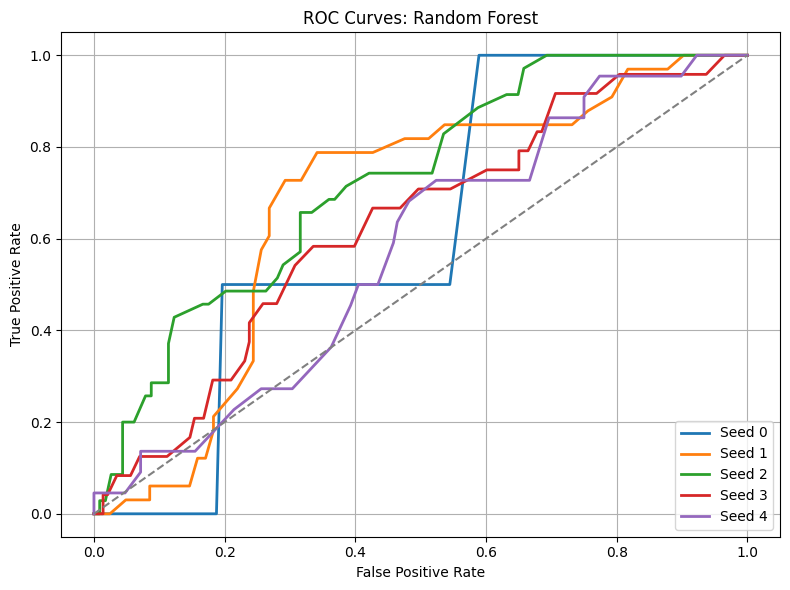

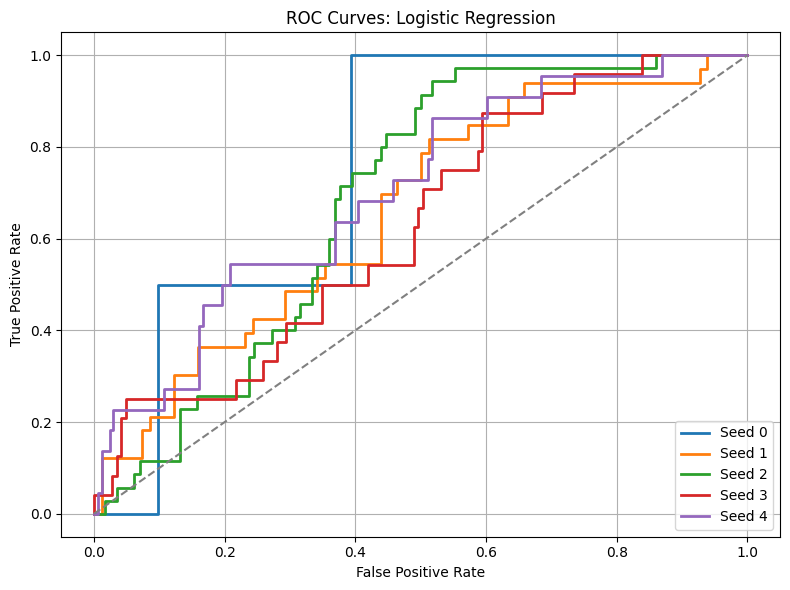

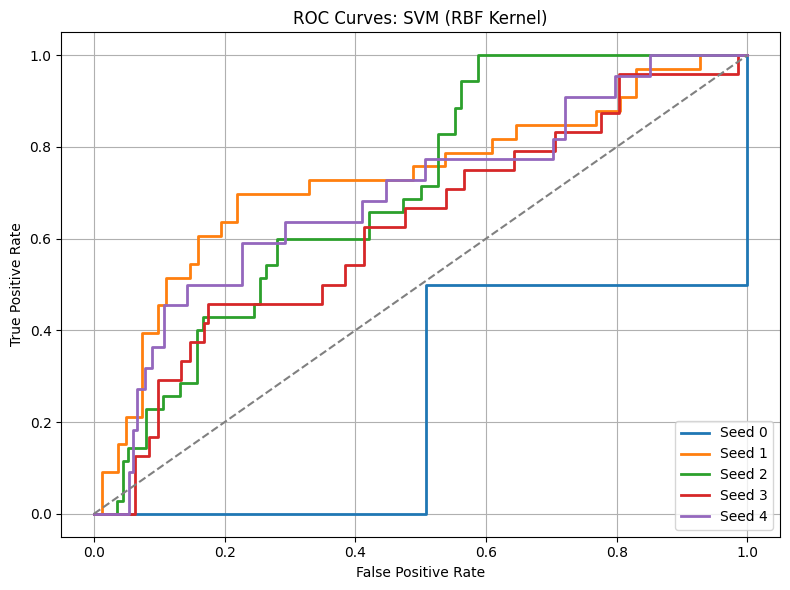

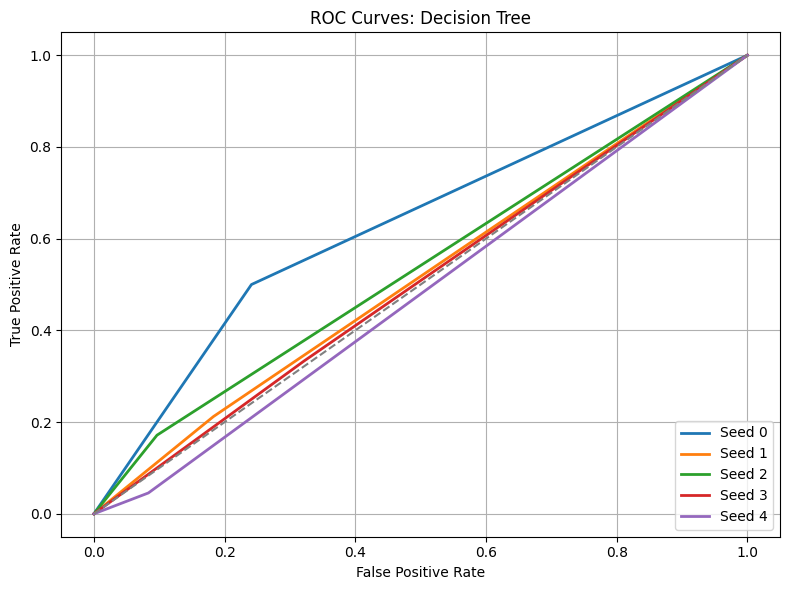

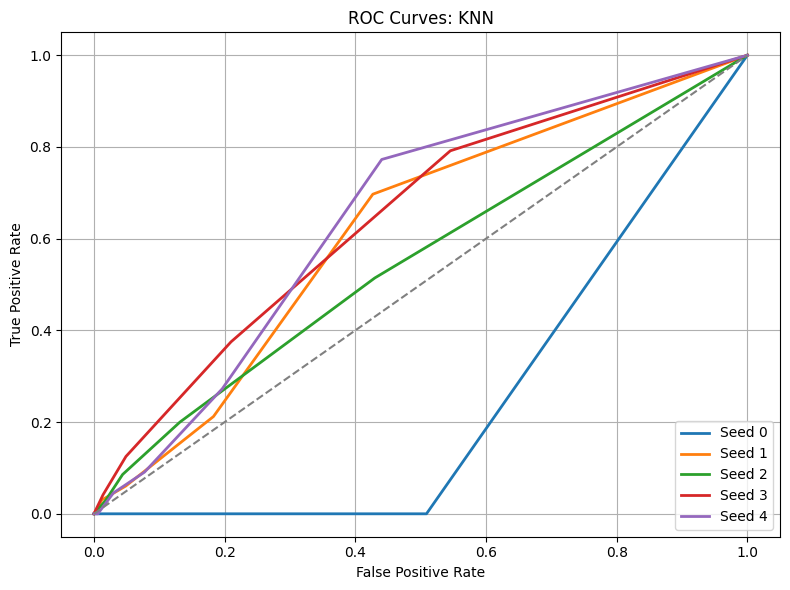

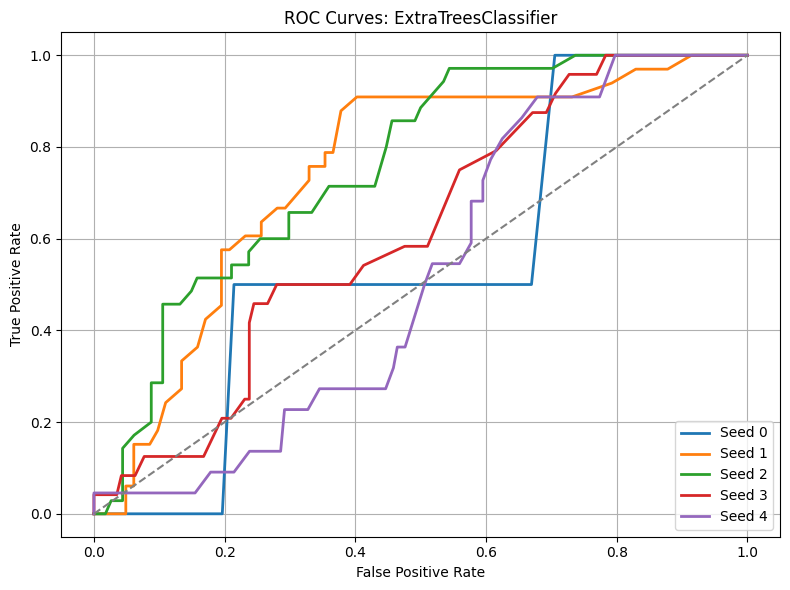

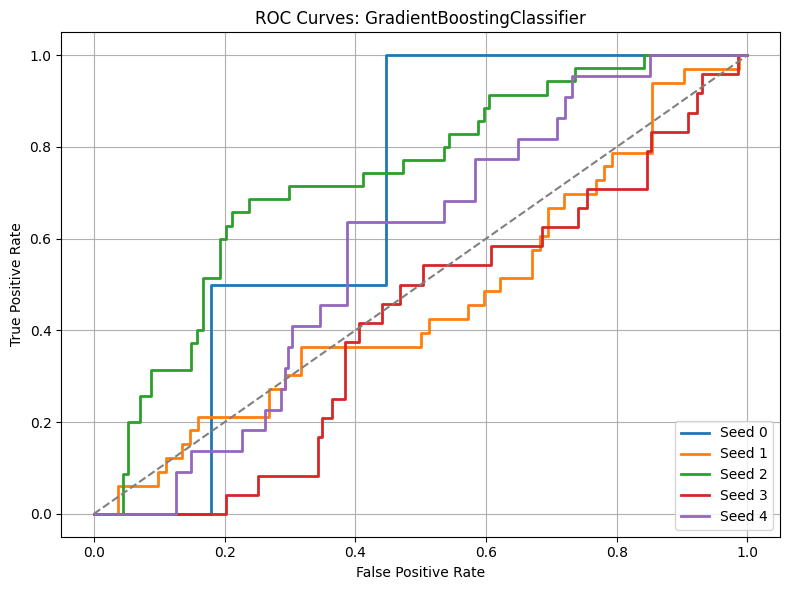


📊 Average AUC per model:
Random Forest: Mean AUC = 0.644 ± 0.051
Logistic Regression: Mean AUC = 0.686 ± 0.042
SVM (RBF Kernel): Mean AUC = 0.599 ± 0.180
Decision Tree: Mean AUC = 0.534 ± 0.051
KNN: Mean AUC = 0.542 ± 0.152
ExtraTreesClassifier: Mean AUC = 0.638 ± 0.098
GradientBoostingClassifier: Mean AUC = 0.577 ± 0.121


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# --- Load Data ---
data = pd.read_csv('./radiomics_features_washu2_p1_143_with_labels_sdf4_nd_normseg.csv')

X = data.drop(columns=['PatientID', 'GT', 'ImagePath', 'Patient ID'])
y = (data['GT'] < 1).astype(int)
groups = data['PatientID']

selected_features = X.columns  # Or assign your selected_features list here
X = X[selected_features]

models = {
    "Random Forest": RandomForestClassifier,
    "Logistic Regression": LogisticRegression,
    "SVM (RBF Kernel)": SVC,
    "Decision Tree": DecisionTreeClassifier,
    "KNN": KNeighborsClassifier, 
    'ExtraTreesClassifier': ExtraTreesClassifier,
    'GradientBoostingClassifier': GradientBoostingClassifier
}

seeds = [0, 1, 2, 3, 4]
results_all = {model: [] for model in models}
roc_all = {model: [] for model in models}

for seed in seeds:
    print(f"\n🔁 Seed {seed}")
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
    train_idx, test_idx = next(gss.split(X, y, groups))
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for model_name, model_class in models.items():
        if model_name == "KNN":
            clf = model_class()
        else:
            clf = model_class(random_state=seed) if 'random_state' in model_class().get_params() else model_class()

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        try:
            y_proba = clf.predict_proba(X_test)[:, 1]
        except:
            y_proba = clf.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # normalize

        acc = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        results_all[model_name].append(auc_score)
        roc_all[model_name].append((seed, fpr, tpr))

# --- Plot ROC curves for each model across seeds ---
for model_name, roc_list in roc_all.items():
    plt.figure(figsize=(8, 6))
    for seed, fpr, tpr in roc_list:
        plt.plot(fpr, tpr, lw=2, label=f'Seed {seed}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.show()

# --- Print Average AUCs ---
print("\n📊 Average AUC per model:")
for model_name, aucs in results_all.items():
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    print(f"{model_name}: Mean AUC = {mean_auc:.3f} ± {std_auc:.3f}")



🔁 Seed 0


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 1


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 2


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 3


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔁 Seed 4


c:\Users\mdiqb\anaconda3\envs\py312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


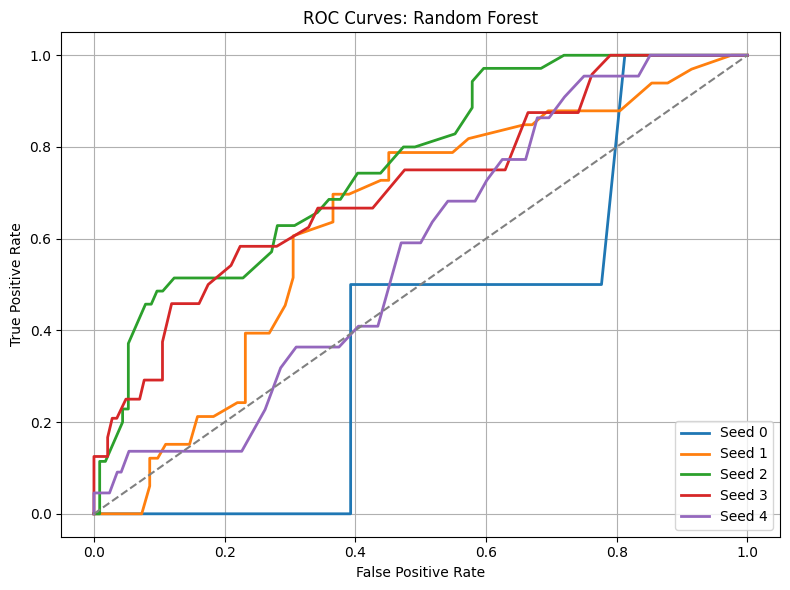

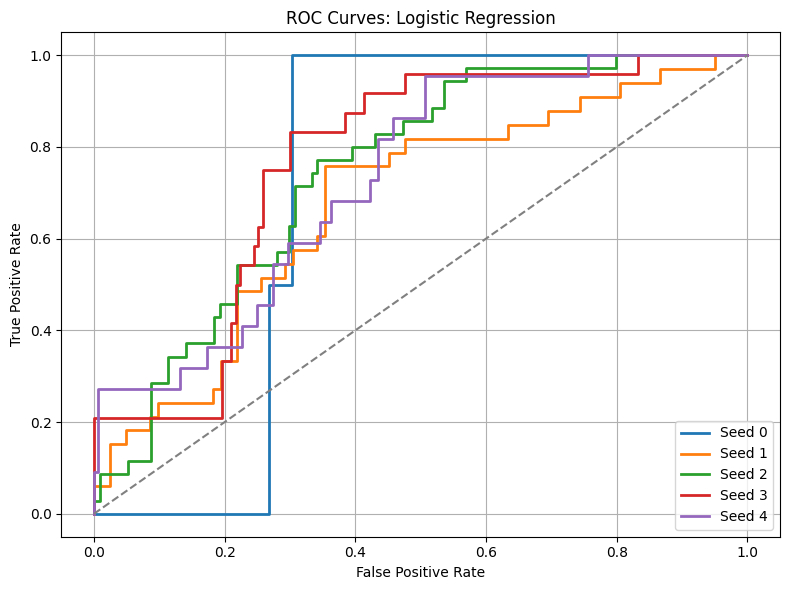

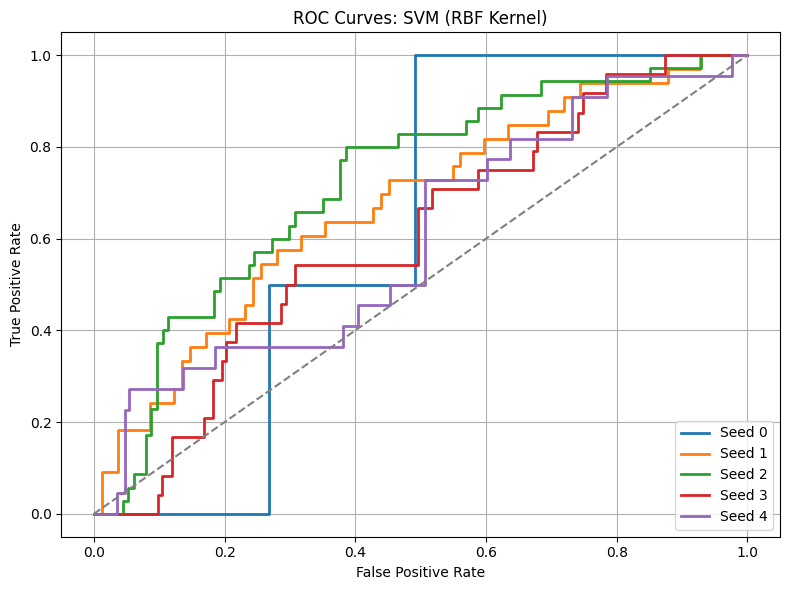

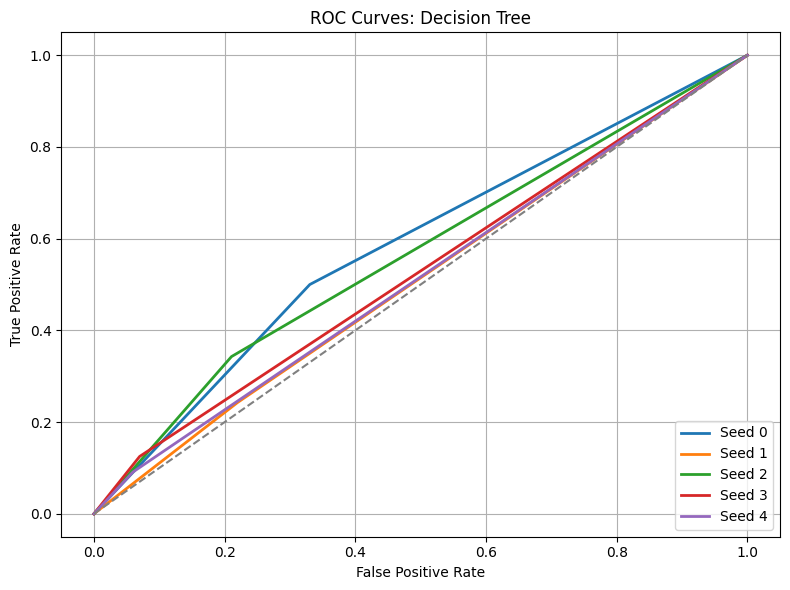

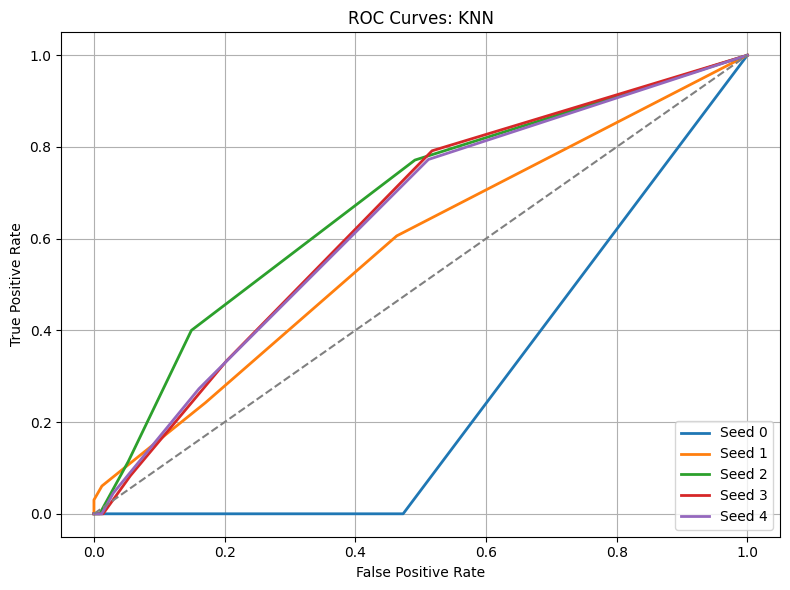

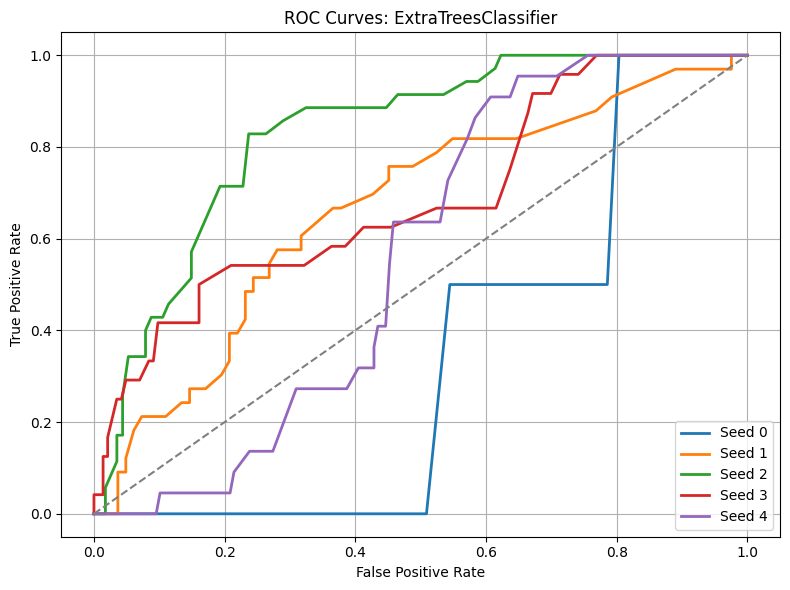

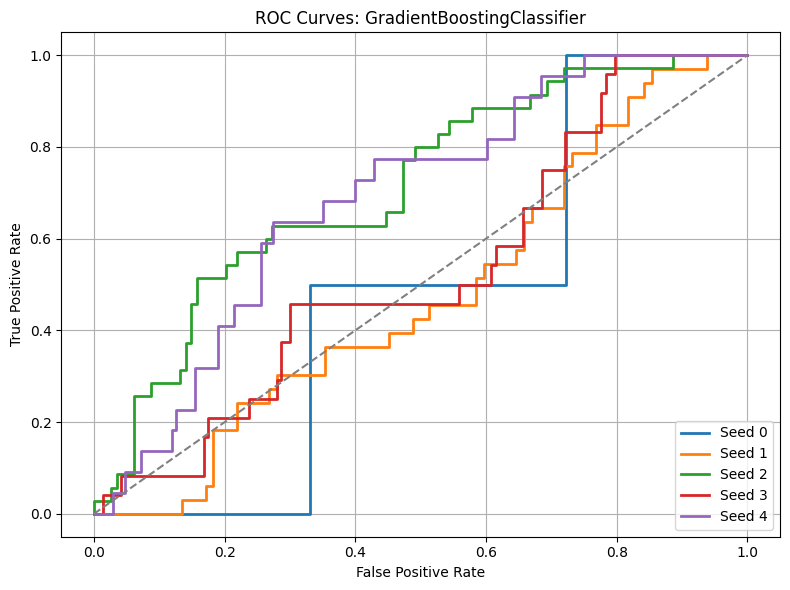


📊 Average AUC per model:
Random Forest: Mean AUC = 0.617 ± 0.124
Logistic Regression: Mean AUC = 0.727 ± 0.029
SVM (RBF Kernel): Mean AUC = 0.643 ± 0.047
Decision Tree: Mean AUC = 0.541 ± 0.029
KNN: Mean AUC = 0.560 ± 0.152
ExtraTreesClassifier: Mean AUC = 0.617 ± 0.163
GradientBoostingClassifier: Mean AUC = 0.576 ± 0.104


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# --- Load Data ---
data = pd.read_csv('./radiomics_features_washu2_p1_143_with_labels_sdf4_nd_normseg.csv')

X = data.drop(columns=['PatientID', 'GT', 'ImagePath', 'Patient ID'])
y = (data['GT'] < 1).astype(int)
groups = data['PatientID']

#selected_features = X.columns  # Or assign your selected_features list here
#selected_features = ['Unnamed: 0', 'original_shape2D_Elongation_x', 'original_shape2D_MajorAxisLength_x', 'original_shape2D_MaximumDiameter_x', 'original_shape2D_Perimeter_x', 'original_firstorder_InterquartileRange_x', 'original_firstorder_Range_x', 'original_firstorder_RobustMeanAbsoluteDeviation_x', 'original_firstorder_Variance_x', 'original_glcm_ClusterTendency_x', 'original_glcm_Correlation_x', 'original_glcm_DifferenceEntropy_x', 'original_glcm_DifferenceVariance_x', 'original_glcm_Idn_x', 'original_glcm_Imc1_x', 'original_glcm_Imc2_x', 'original_glrlm_GrayLevelNonUniformity_x', 'original_glrlm_GrayLevelNonUniformityNormalized_x', 'original_glrlm_GrayLevelVariance_x', 'original_glrlm_LongRunEmphasis_x', 'original_glrlm_LongRunHighGrayLevelEmphasis_x', 'original_glrlm_RunEntropy_x', 'original_glrlm_RunPercentage_x', 'original_glrlm_RunVariance_x', 'original_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glszm_GrayLevelNonUniformity_x', 'original_glszm_GrayLevelVariance_x', 'original_glszm_LargeAreaHighGrayLevelEmphasis_x', 'original_glszm_SizeZoneNonUniformityNormalized_x', 'original_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_glszm_ZoneEntropy_x', 'wavelet-H_firstorder_Energy_x', 'wavelet-H_firstorder_Skewness_x', 'wavelet-H_firstorder_TotalEnergy_x', 'wavelet-H_glcm_ClusterShade_x', 'wavelet-H_glcm_Contrast_x', 'wavelet-H_glcm_Correlation_x', 'wavelet-H_glcm_DifferenceEntropy_x', 'wavelet-H_glcm_Id_x', 'wavelet-H_glcm_Idmn_x', 'wavelet-H_glcm_Idn_x', 'wavelet-H_glcm_MCC_x', 'wavelet-H_glcm_SumAverage_x', 'wavelet-H_glrlm_GrayLevelNonUniformity_x', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-H_glrlm_RunEntropy_x', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-H_glszm_GrayLevelNonUniformity_x', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glszm_GrayLevelVariance_x', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_ZoneEntropy_x', 'wavelet-H_glszm_ZoneVariance_x', 'wavelet-L_firstorder_10Percentile_x', 'wavelet-L_firstorder_90Percentile_x', 'wavelet-L_firstorder_Energy_x', 'wavelet-L_firstorder_Kurtosis_x', 'wavelet-L_firstorder_MeanAbsoluteDeviation_x', 'wavelet-L_firstorder_Skewness_x', 'wavelet-L_firstorder_TotalEnergy_x', 'wavelet-L_glcm_DifferenceEntropy_x', 'wavelet-L_glcm_DifferenceVariance_x', 'wavelet-L_glcm_InverseVariance_x', 'wavelet-L_glcm_JointEnergy_x', 'wavelet-L_glrlm_GrayLevelNonUniformity_x', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis_x', 'wavelet-L_glrlm_LongRunEmphasis_x', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_RunLengthNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_x', 'wavelet-L_glrlm_ShortRunEmphasis_x', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-L_glszm_GrayLevelNonUniformity_x', 'wavelet-L_glszm_LargeAreaEmphasis_x', 'wavelet-L_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_shape2D_MinorAxisLength_y', 'original_shape2D_PerimeterSurfaceRatio_y', 'original_shape2D_PixelSurface_y', 'original_firstorder_10Percentile_y', 'original_firstorder_MeanAbsoluteDeviation_y', 'original_firstorder_Median_y', 'original_firstorder_RootMeanSquared_y', 'original_firstorder_Variance_y', 'original_glcm_ClusterShade_y', 'original_glcm_ClusterTendency_y', 'original_glcm_Correlation_y', 'original_glcm_DifferenceAverage_y', 'original_glcm_DifferenceEntropy_y', 'original_glcm_Idn_y', 'original_glcm_InverseVariance_y', 'original_glcm_JointEntropy_y', 'original_glcm_MaximumProbability_y', 'original_glrlm_GrayLevelNonUniformityNormalized_y', 'original_glrlm_GrayLevelVariance_y', 'original_glrlm_LongRunEmphasis_y', 'original_glrlm_LowGrayLevelRunEmphasis_y', 'original_glrlm_RunPercentage_y', 'original_glrlm_ShortRunEmphasis_y', 'original_glszm_GrayLevelVariance_y', 'original_glszm_LargeAreaEmphasis_y', 'original_glszm_LargeAreaLowGrayLevelEmphasis_y', 'original_glszm_SizeZoneNonUniformity_y', 'original_glszm_SizeZoneNonUniformityNormalized_y', 'original_glszm_SmallAreaEmphasis_y', 'wavelet-H_firstorder_90Percentile_y', 'wavelet-H_firstorder_Energy_y', 'wavelet-H_firstorder_Entropy_y', 'wavelet-H_firstorder_Uniformity_y', 'wavelet-H_glcm_Idmn_y', 'wavelet-H_glcm_InverseVariance_y', 'wavelet-H_glcm_JointEnergy_y', 'wavelet-H_glcm_JointEntropy_y', 'wavelet-H_glrlm_GrayLevelNonUniformity_y', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-H_glrlm_RunLengthNonUniformityNormalized_y', 'wavelet-H_glrlm_RunPercentage_y', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_y', 'wavelet-H_glszm_SizeZoneNonUniformity_y', 'wavelet-H_glszm_ZonePercentage_y', 'wavelet-L_firstorder_90Percentile_y', 'wavelet-L_firstorder_Kurtosis_y', 'wavelet-L_firstorder_Maximum_y', 'wavelet-L_firstorder_Median_y', 'wavelet-L_firstorder_RootMeanSquared_y', 'wavelet-L_firstorder_Skewness_y', 'wavelet-L_glcm_Autocorrelation_y', 'wavelet-L_glcm_ClusterTendency_y', 'wavelet-L_glcm_Correlation_y', 'wavelet-L_glcm_DifferenceEntropy_y', 'wavelet-L_glcm_Idmn_y', 'wavelet-L_glcm_Idn_y', 'wavelet-L_glcm_Imc1_y', 'wavelet-L_glcm_SumSquares_y', 'wavelet-L_glrlm_GrayLevelVariance_y', 'wavelet-L_glrlm_LongRunEmphasis_y', 'wavelet-L_glrlm_LongRunLowGrayLevelEmphasis_y', 'wavelet-L_glrlm_LowGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunEntropy_y', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_y', 'wavelet-L_glrlm_RunPercentage_y', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-L_glszm_GrayLevelNonUniformity_y', 'wavelet-L_glszm_GrayLevelVariance_y', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_ZoneVariance_y', 'original_shape2D_MeshSurface_x', 'original_firstorder_Kurtosis_x', 'original_firstorder_TotalEnergy_x', 'original_glcm_Id_x', 'original_glcm_Idm_x', 'original_glcm_JointAverage_x', 'original_glcm_SumAverage_x', 'original_glrlm_LowGrayLevelRunEmphasis_x', 'original_glrlm_ShortRunLowGrayLevelEmphasis_x', 'original_glszm_HighGrayLevelZoneEmphasis_x', 'original_glszm_SmallAreaLowGrayLevelEmphasis_x', 'original_glszm_ZonePercentage_x', 'wavelet-H_firstorder_Mean_x', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_x', 'wavelet-H_firstorder_Uniformity_x', 'wavelet-H_glcm_ClusterProminence_x', 'wavelet-H_glcm_SumEntropy_x', 'wavelet-H_glrlm_GrayLevelVariance_x', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformity_x', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_ZonePercentage_x', 'wavelet-L_firstorder_Entropy_x', 'wavelet-L_firstorder_Range_x', 'wavelet-L_firstorder_Variance_x', 'wavelet-L_glcm_Autocorrelation_x', 'wavelet-L_glcm_Correlation_x', 'wavelet-L_glcm_Id_x', 'wavelet-L_glcm_Idmn_x', 'wavelet-L_glcm_Idn_x', 'wavelet-L_glcm_Imc2_x', 'wavelet-L_glcm_MaximumProbability_x', 'wavelet-L_glszm_SizeZoneNonUniformity_x', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized_x', 'original_shape2D_Elongation_y', 'original_firstorder_90Percentile_y', 'original_firstorder_Energy_y', 'original_firstorder_Maximum_y', 'original_glcm_DifferenceVariance_y', 'original_glcm_Idmn_y', 'original_glrlm_RunEntropy_y', 'original_glrlm_ShortRunHighGrayLevelEmphasis_y', 'original_glszm_SmallAreaLowGrayLevelEmphasis_y', 'original_glszm_ZoneEntropy_y', 'wavelet-H_firstorder_Maximum_y', 'wavelet-H_firstorder_Median_y', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_y', 'wavelet-H_glcm_ClusterProminence_y', 'wavelet-H_glcm_Correlation_y', 'wavelet-H_glcm_DifferenceVariance_y', 'wavelet-H_glcm_Id_y', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_y', 'wavelet-H_glrlm_RunVariance_y', 'wavelet-H_glszm_GrayLevelNonUniformity_y', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-H_glszm_ZoneEntropy_y', 'wavelet-L_firstorder_10Percentile_y', 'wavelet-L_firstorder_Entropy_y', 'wavelet-L_glcm_Contrast_y', 'wavelet-L_glcm_DifferenceVariance_y', 'wavelet-L_glcm_Imc2_y', 'wavelet-L_glcm_InverseVariance_y', 'wavelet-L_glcm_SumEntropy_y', 'wavelet-L_glrlm_RunLengthNonUniformity_y', 'wavelet-L_glszm_ZoneEntropy_y', 'original_glcm_JointEntropy_x', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glcm_SumAverage_y', 'wavelet-L_firstorder_MeanAbsoluteDeviation_y', 'wavelet-L_glcm_MaximumProbability_y', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glrlm_LongRunHighGrayLevelEmphasis_y']

# based on 3 votes 
selected_features = ['Unnamed: 0', 'original_shape2D_Elongation_x', 'original_shape2D_MajorAxisLength_x', 'original_shape2D_MaximumDiameter_x', 'original_shape2D_Perimeter_x', 'original_shape2D_PerimeterSurfaceRatio_x', 'original_shape2D_PixelSurface_x', 'original_firstorder_Entropy_x', 'original_firstorder_Range_x', 'original_firstorder_RobustMeanAbsoluteDeviation_x', 'original_glcm_ClusterTendency_x', 'original_glcm_Contrast_x', 'original_glcm_Id_x', 'original_glcm_Idmn_x', 'original_glcm_Idn_x', 'original_glcm_MCC_x', 'original_glcm_MaximumProbability_x', 'original_glcm_SumSquares_x', 'original_glrlm_GrayLevelNonUniformity_x', 'original_glrlm_HighGrayLevelRunEmphasis_x', 'original_glrlm_LongRunLowGrayLevelEmphasis_x', 'original_glrlm_LowGrayLevelRunEmphasis_x', 'original_glrlm_RunEntropy_x', 'original_glrlm_RunLengthNonUniformityNormalized_x', 'original_glrlm_RunPercentage_x', 'original_glrlm_ShortRunHighGrayLevelEmphasis_x', 'original_glszm_GrayLevelNonUniformity_x', 'original_glszm_HighGrayLevelZoneEmphasis_x', 'original_glszm_ZoneVariance_x', 'wavelet-H_firstorder_10Percentile_x', 'wavelet-H_firstorder_Energy_x', 'wavelet-H_firstorder_Maximum_x', 'wavelet-H_firstorder_MeanAbsoluteDeviation_x', 'wavelet-H_firstorder_RootMeanSquared_x', 'wavelet-H_firstorder_Skewness_x', 'wavelet-H_firstorder_Variance_x', 'wavelet-H_glcm_ClusterTendency_x', 'wavelet-H_glcm_Correlation_x', 'wavelet-H_glcm_DifferenceAverage_x', 'wavelet-H_glcm_DifferenceEntropy_x', 'wavelet-H_glcm_Id_x', 'wavelet-H_glcm_Idn_x', 'wavelet-H_glcm_Imc2_x', 'wavelet-H_glcm_InverseVariance_x', 'wavelet-H_glcm_JointAverage_x', 'wavelet-H_glcm_JointEnergy_x', 'wavelet-H_glcm_MCC_x', 'wavelet-H_glcm_MaximumProbability_x', 'wavelet-H_glcm_SumEntropy_x', 'wavelet-H_glrlm_GrayLevelNonUniformity_x', 'wavelet-H_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glrlm_RunVariance_x', 'wavelet-H_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-H_glszm_LargeAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaEmphasis_x', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_x', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_glszm_ZoneEntropy_x', 'wavelet-L_firstorder_MeanAbsoluteDeviation_x', 'wavelet-L_firstorder_Uniformity_x', 'wavelet-L_glcm_Autocorrelation_x', 'wavelet-L_glcm_DifferenceAverage_x', 'wavelet-L_glcm_Idm_x', 'wavelet-L_glcm_Idmn_x', 'wavelet-L_glcm_Idn_x', 'wavelet-L_glcm_JointAverage_x', 'wavelet-L_glcm_JointEnergy_x', 'wavelet-L_glcm_JointEntropy_x', 'wavelet-L_glcm_MCC_x', 'wavelet-L_glcm_MaximumProbability_x', 'wavelet-L_glcm_SumSquares_x', 'wavelet-L_glrlm_GrayLevelNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformity_x', 'wavelet-L_glrlm_RunLengthNonUniformityNormalized_x', 'wavelet-L_glrlm_RunPercentage_x', 'wavelet-L_glrlm_ShortRunHighGrayLevelEmphasis_x', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_x', 'wavelet-L_glszm_GrayLevelNonUniformity_x', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-L_glszm_SizeZoneNonUniformity_x', 'wavelet-L_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_glszm_SmallAreaEmphasis_x', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_x', 'original_shape2D_Elongation_y', 'original_shape2D_MeshSurface_y', 'original_shape2D_Perimeter_y', 'original_firstorder_InterquartileRange_y', 'original_firstorder_Range_y', 'original_firstorder_RobustMeanAbsoluteDeviation_y', 'original_firstorder_TotalEnergy_y', 'original_glcm_ClusterProminence_y', 'original_glcm_DifferenceAverage_y', 'original_glcm_DifferenceVariance_y', 'original_glcm_InverseVariance_y', 'original_glcm_JointEnergy_y', 'original_glcm_MCC_y', 'original_glcm_SumEntropy_y', 'original_glrlm_GrayLevelVariance_y', 'original_glrlm_LowGrayLevelRunEmphasis_y', 'original_glrlm_RunEntropy_y', 'original_glrlm_ShortRunLowGrayLevelEmphasis_y', 'original_glszm_GrayLevelNonUniformity_y', 'original_glszm_GrayLevelVariance_y', 'original_glszm_LargeAreaEmphasis_y', 'original_glszm_SizeZoneNonUniformity_y', 'original_glszm_SmallAreaHighGrayLevelEmphasis_y', 'original_glszm_SmallAreaLowGrayLevelEmphasis_y', 'original_glszm_ZoneEntropy_y', 'original_glszm_ZoneVariance_y', 'wavelet-H_firstorder_90Percentile_y', 'wavelet-H_firstorder_Entropy_y', 'wavelet-H_firstorder_InterquartileRange_y', 'wavelet-H_firstorder_Maximum_y', 'wavelet-H_firstorder_MeanAbsoluteDeviation_y', 'wavelet-H_firstorder_Minimum_y', 'wavelet-H_firstorder_Range_y', 'wavelet-H_firstorder_Skewness_y', 'wavelet-H_glcm_ClusterProminence_y', 'wavelet-H_glcm_ClusterTendency_y', 'wavelet-H_glcm_DifferenceVariance_y', 'wavelet-H_glcm_Imc1_y', 'wavelet-H_glcm_Imc2_y', 'wavelet-H_glcm_JointEntropy_y', 'wavelet-H_glcm_MCC_y', 'wavelet-H_glcm_SumAverage_y', 'wavelet-H_glcm_SumEntropy_y', 'wavelet-H_glcm_SumSquares_y', 'wavelet-H_glrlm_GrayLevelNonUniformity_y', 'wavelet-H_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_y', 'wavelet-H_glrlm_LongRunLowGrayLevelEmphasis_y', 'wavelet-H_glrlm_ShortRunEmphasis_y', 'wavelet-H_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-H_glszm_GrayLevelNonUniformity_y', 'wavelet-H_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glszm_GrayLevelVariance_y', 'wavelet-H_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaHighGrayLevelEmphasis_y', 'wavelet-H_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-H_glszm_ZoneEntropy_y', 'wavelet-H_glszm_ZonePercentage_y', 'wavelet-L_firstorder_90Percentile_y', 'wavelet-L_firstorder_Entropy_y', 'wavelet-L_firstorder_Skewness_y', 'wavelet-L_firstorder_TotalEnergy_y', 'wavelet-L_glcm_Idm_y', 'wavelet-L_glcm_Idmn_y', 'wavelet-L_glcm_Idn_y', 'wavelet-L_glcm_Imc2_y', 'wavelet-L_glcm_JointAverage_y', 'wavelet-L_glcm_MCC_y', 'wavelet-L_glcm_SumAverage_y', 'wavelet-L_glcm_SumSquares_y', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glrlm_LowGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunLengthNonUniformity_y', 'wavelet-L_glrlm_RunVariance_y', 'wavelet-L_glrlm_ShortRunLowGrayLevelEmphasis_y', 'wavelet-L_glszm_GrayLevelNonUniformity_y', 'wavelet-L_glszm_LargeAreaEmphasis_y', 'wavelet-L_glszm_LargeAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_LowGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaEmphasis_y', 'wavelet-L_glszm_ZoneEntropy_y', 'wavelet-L_glszm_ZonePercentage_y', 'original_firstorder_Median_x', 'original_firstorder_Minimum_x', 'original_firstorder_Uniformity_x', 'original_firstorder_Variance_x', 'original_glcm_Correlation_x', 'original_glcm_DifferenceAverage_x', 'original_glcm_DifferenceEntropy_x', 'original_glcm_JointAverage_x', 'original_glrlm_GrayLevelNonUniformityNormalized_x', 'original_glrlm_GrayLevelVariance_x', 'original_glrlm_RunLengthNonUniformity_x', 'original_glszm_LargeAreaEmphasis_x', 'original_glszm_SizeZoneNonUniformityNormalized_x', 'original_glszm_SmallAreaEmphasis_x', 'original_glszm_SmallAreaLowGrayLevelEmphasis_x', 'wavelet-H_firstorder_RobustMeanAbsoluteDeviation_x', 'wavelet-H_firstorder_Uniformity_x', 'wavelet-H_glcm_Idmn_x', 'wavelet-H_glcm_SumAverage_x', 'wavelet-H_glrlm_LongRunHighGrayLevelEmphasis_x', 'wavelet-H_glrlm_LowGrayLevelRunEmphasis_x', 'wavelet-H_glszm_GrayLevelVariance_x', 'wavelet-H_glszm_LowGrayLevelZoneEmphasis_x', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_x', 'wavelet-L_firstorder_90Percentile_x', 'wavelet-L_firstorder_Median_x', 'wavelet-L_firstorder_TotalEnergy_x', 'wavelet-L_glcm_Correlation_x', 'wavelet-L_glcm_DifferenceVariance_x', 'wavelet-L_glcm_Imc2_x', 'wavelet-L_glrlm_GrayLevelNonUniformityNormalized_x', 'wavelet-L_glrlm_RunEntropy_x', 'wavelet-L_glszm_ZonePercentage_x', 'original_shape2D_MajorAxisLength_y', 'original_shape2D_MinorAxisLength_y', 'original_shape2D_PixelSurface_y', 'original_firstorder_Maximum_y', 'original_glcm_ClusterShade_y', 'original_glcm_Correlation_y', 'original_glcm_DifferenceEntropy_y', 'original_glcm_Imc1_y', 'original_glcm_MaximumProbability_y', 'wavelet-H_firstorder_10Percentile_y', 'wavelet-H_firstorder_Median_y', 'wavelet-H_firstorder_TotalEnergy_y', 'wavelet-H_glcm_Autocorrelation_y', 'wavelet-H_glcm_ClusterShade_y', 'wavelet-H_glcm_Idn_y', 'wavelet-H_glcm_JointEnergy_y', 'wavelet-H_glrlm_GrayLevelVariance_y', 'wavelet-H_glszm_SizeZoneNonUniformityNormalized_y', 'wavelet-L_firstorder_Energy_y', 'wavelet-L_firstorder_MeanAbsoluteDeviation_y', 'wavelet-L_firstorder_RootMeanSquared_y', 'wavelet-L_firstorder_Variance_y', 'wavelet-L_glcm_Contrast_y', 'wavelet-L_glcm_JointEntropy_y', 'wavelet-L_glrlm_HighGrayLevelRunEmphasis_y', 'wavelet-L_glrlm_RunEntropy_y', 'wavelet-L_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-L_glszm_GrayLevelVariance_y', 'wavelet-L_glszm_HighGrayLevelZoneEmphasis_y', 'wavelet-L_glszm_SmallAreaLowGrayLevelEmphasis_y', 'wavelet-L_glszm_ZoneVariance_y', 'original_glcm_JointEnergy_x', 'original_glrlm_RunVariance_x', 'original_glszm_GrayLevelNonUniformityNormalized_x', 'wavelet-H_glcm_Autocorrelation_x', 'wavelet-H_glrlm_GrayLevelVariance_x', 'wavelet-L_glcm_SumEntropy_x', 'wavelet-L_glszm_SmallAreaHighGrayLevelEmphasis_x', 'original_glcm_Idm_y', 'original_glszm_GrayLevelNonUniformityNormalized_y', 'wavelet-H_glcm_Id_y', 'wavelet-H_glrlm_RunEntropy_y', 'wavelet-L_glcm_ClusterShade_y', 'wavelet-L_glcm_DifferenceAverage_y', 'wavelet-L_glcm_InverseVariance_y']
X = X[selected_features]

models = {
    "Random Forest": RandomForestClassifier,
    "Logistic Regression": LogisticRegression,
    "SVM (RBF Kernel)": SVC,
    "Decision Tree": DecisionTreeClassifier,
    "KNN": KNeighborsClassifier, 
    'ExtraTreesClassifier': ExtraTreesClassifier,
    'GradientBoostingClassifier': GradientBoostingClassifier
}

seeds = [0, 1, 2, 3, 4]
results_all = {model: [] for model in models}
roc_all = {model: [] for model in models}

for seed in seeds:
    print(f"\n🔁 Seed {seed}")
    gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)
    train_idx, test_idx = next(gss.split(X, y, groups))
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    for model_name, model_class in models.items():
        if model_name == "KNN":
            clf = model_class()
        else:
            clf = model_class(random_state=seed) if 'random_state' in model_class().get_params() else model_class()

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        try:
            y_proba = clf.predict_proba(X_test)[:, 1]
        except:
            y_proba = clf.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # normalize

        acc = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)

        results_all[model_name].append(auc_score)
        roc_all[model_name].append((seed, fpr, tpr))

# --- Plot ROC curves for each model across seeds ---
for model_name, roc_list in roc_all.items():
    plt.figure(figsize=(8, 6))
    for seed, fpr, tpr in roc_list:
        plt.plot(fpr, tpr, lw=2, label=f'Seed {seed}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves: {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.tight_layout()
    plt.show()

# --- Print Average AUCs ---
print("\n📊 Average AUC per model:")
for model_name, aucs in results_all.items():
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    print(f"{model_name}: Mean AUC = {mean_auc:.3f} ± {std_auc:.3f}")